# Cluster Comparison Figure

In [1]:
import numpy as np
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
#from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import contextily as ctx
import ulmo
import datetime as dt
from datetime import datetime
#from shapely.geometry import Point
#import metloom
#from metloom.pointdata import CDECPointData
#from metloom.pointdata import SnotelPointData
#from metloom.variables import CdecStationVariables
import pickle
import scipy.stats as stats
# SVD function from scipy
from scipy.linalg import svd
import sklearn
from sklearn.cluster import KMeans

import rioxarray as rxr
import xarray as xr
import rasterio as rio
import matplotlib
import regionmask

In [2]:
clusters = xr.open_dataset('../../data/swe_reanalysis_5clusters.nc').rio.write_crs('epsg:4326',inplace=True)
clusters = clusters.__xarray_dataarray_variable__

In [103]:
clusters.rio.crs

CRS.from_epsg(4326)

In [3]:
clusters = xr.open_dataset('../../data/swe_reanalysis_5clusters.nc')

In [101]:
clusters.rio.crs

In [7]:
station_clusters = pickle.load(open('../../data/combined_snotel_cdec/station_clusters.pkl', 'rb'))

In [8]:
wstates = gpd.read_file('../../data/misc/western_states.shp')
wstates_4326=wstates.to_crs('epsg:4326')

In [104]:
#clusters.rio.to_raster('../../data/swe_reanalysis_5clusters.tif')

In [9]:
clusters_tif = rxr.open_rasterio('../../data/swe_reanalysis_5clusters.tif', masked=True).squeeze()

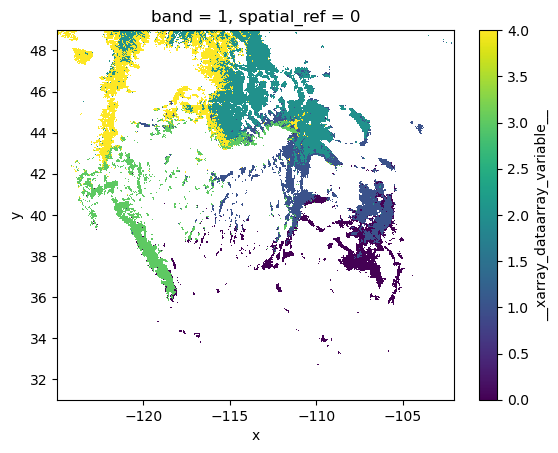

In [12]:
clusters_tif.plot()

/var/folders/yr/1f67jccn6hl_lyxnqy7qjpq40000gp/T/ipykernel_10461/3638721431.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  clusters.plot(cmap = plt.cm.get_cmap(cmap1, 6), ax=ax[0], add_colorbar=True)


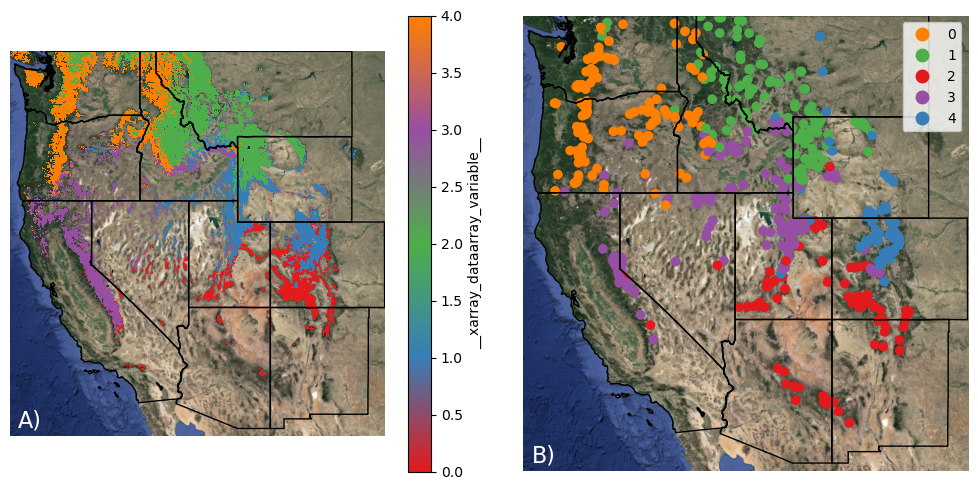

In [39]:
from matplotlib.colors import LinearSegmentedColormap
colors1=['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00'] #,'#ffff33'
cmap1 = LinearSegmentedColormap.from_list('clusters', colors1)
colors2=['#ff7f00','#4daf4a','#e41a1c','#984ea3','#377eb8'] #,'#ffff33'
cmap2 = LinearSegmentedColormap.from_list('clusters', colors2)

fig, ax = plt.subplots(1,2, figsize=(10,5))

clusters.plot(cmap = plt.get_cmap(cmap1, 6), ax=ax[0], add_colorbar=True)
ctx.add_basemap(ax=ax[0], crs='epsg:4326', source='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}', zoom=8, attribution=False)
wstates_4326.plot(ax=ax[0], facecolor='none',edgecolor='k')
ax[1].set_xlim(-125,-102)
ax[1].set_ylim(31, 49)
ax[0].set_axis_off()
ax[0].annotate(text='A)', xy=(0.02,0.02), xycoords='axes fraction',fontsize=16, color='white')

station_clusters.plot(ax=ax[1], column='cluster_anom', cmap=cmap2, legend=True)
ctx.add_basemap(ax=ax[1], crs='epsg:4326', source='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}', zoom=8, attribution=False)
wstates_4326.plot(ax=ax[1], facecolor='none',edgecolor='k')
ax[1].set_xlim(-125,-102)
ax[1].set_ylim(31, 49)
ax[1].set_axis_off()
ax[1].annotate(text='B)', xy=(0.02,0.02), xycoords='axes fraction',fontsize=16, color='white')

plt.tight_layout()
#plt.savefig('../../figures/cluster_comparison.jpeg', dpi=300)

/var/folders/yr/1f67jccn6hl_lyxnqy7qjpq40000gp/T/ipykernel_1913/156414028.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  clusters.plot(cmap = plt.cm.get_cmap(cmap1, 6), ax=ax, add_colorbar=False)


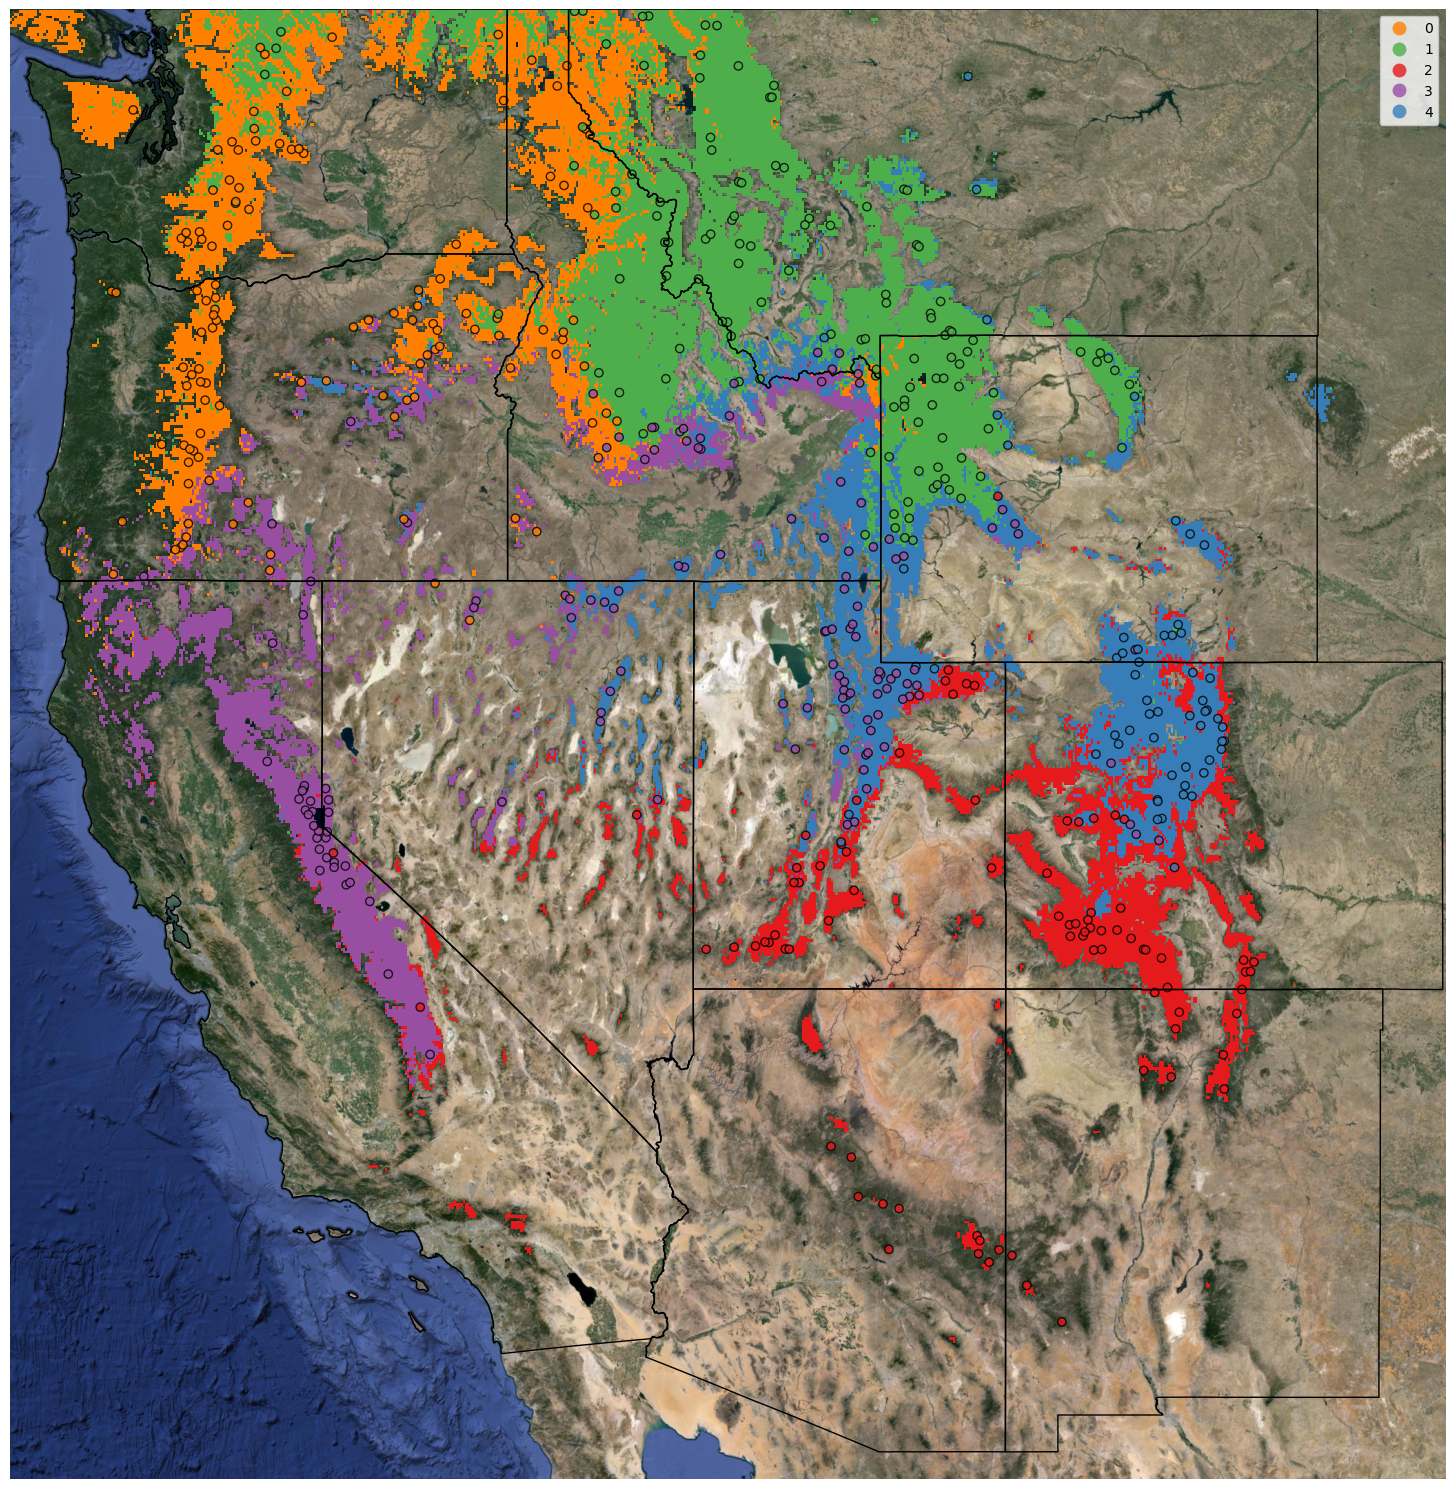

In [135]:
from matplotlib.colors import LinearSegmentedColormap
colors1=['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00'] #,'#ffff33'
cmap1 = LinearSegmentedColormap.from_list('clusters', colors1)
colors2=['#ff7f00','#4daf4a','#e41a1c','#984ea3','#377eb8'] #,'#ffff33'
cmap2 = LinearSegmentedColormap.from_list('clusters', colors2)

fig, ax = plt.subplots(figsize=(15,15))

clusters.plot(cmap = plt.get_cmap(cmap1, 6), ax=ax, add_colorbar=False)
station_clusters.plot(ax=ax, column='cluster_anom', cmap=cmap2, legend=True, edgecolor = 'k', alpha=0.8)
ctx.add_basemap(ax=ax, crs='epsg:4326', source='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}', zoom=8, attribution=False)
wstates_4326.plot(ax=ax, facecolor='none',edgecolor='k')
ax.set_xlim(-125,-102)
ax.set_ylim(31, 49)
ax.set_axis_off()
#ax[0].annotate(text='A)', xy=(0.02,0.02), xycoords='axes fraction',fontsize=16, color='white')

# station_clusters.plot(ax=ax[1], column='cluster_anom', cmap=cmap2, legend=True)
# ctx.add_basemap(ax=ax[1], crs='epsg:4326', source='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}', zoom=8, attribution=False)
# wstates_4326.plot(ax=ax[1], facecolor='none',edgecolor='k')
# ax[1].set_xlim(-125,-102)
# ax[1].set_ylim(31, 49)
# ax[1].set_axis_off()
# ax[1].annotate(text='B)', xy=(0.02,0.02), xycoords='axes fraction',fontsize=16, color='white')

plt.tight_layout()

In [51]:
station_clusters

name network  elevation_m  \
code                                                   
301_CA_SNTL            Adin Mtn  SNOTEL  1886.712036   
302_OR_SNTL     Aneroid Lake #2  SNOTEL  2255.520020   
303_CO_SNTL            Apishapa  SNOTEL  3048.000000   
304_OR_SNTL        Arbuckle Mtn  SNOTEL  1758.696045   
306_ID_SNTL      Atlanta Summit  SNOTEL  2310.384033   
...                         ...     ...          ...   
CRL              CHARLOTTE LAKE    CDEC  3169.920000   
CSV          CASA VIEJA MEADOWS    CDEC  2529.840000   
CAP                 CAPLES LAKE    CDEC  2438.400000   
HHM             HIGHLAND MEADOW    CDEC  2651.760000   
BLD                BLOODS CREEK    CDEC  2194.560000   

                                              geometry cluster_anom  \
code                                                                  
301_CA_SNTL   POINT Z (-120.79192 41.23583 1886.71204)            3   
302_OR_SNTL   POINT Z (-117.19258 45.21328 2255.52002)            0   
303_CO_SNTL   POINT Z (-105.06749 37.33062 3048.00000)            2   
304_OR_SNTL   POINT Z (-119.25392 45.19085 1758.69604)            0   
306_ID_SNTL   POINT Z (-115.23907 43.75690 2310.38403)            3   
...                                                ...          ...   
CRL          POINT Z (-118.42601 36.77752 10400.00000)            2   
CSV           POINT Z (-118.26769 36.19810 8300.00000)            3   
CAP           POINT Z (-120.04158 38.71079 8000.00000)            3   
HHM           POINT Z (-119.80563 38.49066 8700.00000)            3   
BLD           POINT Z (-120.03488 38.45126 7200.00000)            3   

             cluster_sampled         code  
code                                       
301_CA_SNTL              NaN  301_CA_SNTL  
302_OR_SNTL         2.496181  302_OR_SNTL  
303_CO_SNTL              NaN  303_CO_SNTL  
304_OR_SNTL              NaN  304_OR_SNTL  
306_ID_SNTL         3.975497  306_ID_SNTL  
...                      ...          ...  
CRL                 3.000000          CRL  
CSV                 3.000000          CSV  
CAP                 3.000000          CAP  
HHM                 3.000000          HHM  
BLD                 3.000000          BLD  

[511 rows x 7 columns]

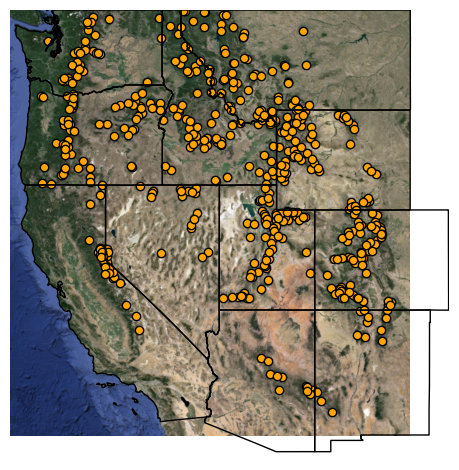

In [47]:
from matplotlib.colors import LinearSegmentedColormap
colors1=['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00'] #,'#ffff33'
cmap1 = LinearSegmentedColormap.from_list('clusters', colors1)
colors2=['#ff7f00','#4daf4a','#e41a1c','#984ea3','#377eb8'] #,'#ffff33'
cmap2 = LinearSegmentedColormap.from_list('clusters', colors2)

fig, ax = plt.subplots() #figsize=(15,15)

#clusters.plot(cmap = plt.get_cmap(cmap1, 6), ax=ax, add_colorbar=False)
station_clusters.plot(ax=ax,column='orange',edgecolor='k')
ctx.add_basemap(ax=ax, crs='epsg:4326', source='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}', zoom=8, attribution=False)
wstates_4326.plot(ax=ax, facecolor='none',edgecolor='k')
ax.set_xlim(-125,-102)
ax.set_ylim(31, 49)
ax.set_axis_off()
#ax[0].annotate(text='A)', xy=(0.02,0.02), xycoords='axes fraction',fontsize=16, color='white')

# station_clusters.plot(ax=ax[1], column='cluster_anom', cmap=cmap2, legend=True)
# ctx.add_basemap(ax=ax[1], crs='epsg:4326', source='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}', zoom=8, attribution=False)
# wstates_4326.plot(ax=ax[1], facecolor='none',edgecolor='k')
# ax[1].set_xlim(-125,-102)
# ax[1].set_ylim(31, 49)
# ax[1].set_axis_off()
# ax[1].annotate(text='B)', xy=(0.02,0.02), xycoords='axes fraction',fontsize=16, color='white')

plt.tight_layout()
plt.savefig('../../figures/snotel_sites.png',dpi=300)

In [11]:
swe_colors = {'red':0, 'blue':1, 'green':2, 'purple':3, 'orange':4}
snotel_colors = {'orange':0, 'green':1, 'red':2, 'purple':3, 'blue':4}
swe_to_snotel = {-1:-1, 0:2, 1:4, 2:1, 3:3, 4:0}

In [12]:
import core

In [13]:
coord = [(pt.x, pt.y) for pt in station_clusters.geometry]

In [21]:
# This function was written by Friedrich Knuth, UW and is contained in core.py
# The sampling technique can be specified, here we use bicubic

cluster_sample = core.interpolate('../../data/swe_reanalysis_5clusters.tif', coord, offset=3, kind='linear')

In [22]:
station_clusters['cluster_sampled'] = cluster_sample

In [23]:
station_clusters.index = station_clusters.index.astype('string')

In [24]:
swe_to_snotel

{-1: -1, 0: 2, 1: 4, 2: 1, 3: 3, 4: 0}

In [25]:
np.isnan(station_clusters['cluster_sampled']).sum()

195

In [26]:
195*32

6240

In [106]:
station_clusters['cluster_sampled'] = station_clusters['cluster_sampled'].fillna(-1)

In [108]:
station_clusters['agree'] = 0

for i in station_clusters.index:
    if station_clusters.loc[i,'cluster_anom'] == swe_to_snotel[int(station_clusters.loc[i,'cluster_sampled'])]:
        station_clusters.loc[i,'agree'] = 1
    else:
        station_clusters.loc[i,'agree'] = 0
    

In [112]:
station_clusters['agree'].sum() / len(station_clusters['agree']) * 100

62.62230919765166

In [115]:
count_list = []
for i in station_clusters.index:
    if station_clusters.loc[i,'cluster_sampled'] == -1:
        count_list.append(1)
    else:
        continue
    

In [119]:
len(count_list) / len(station_clusters['cluster_sampled'])

0.06653620352250489

In [123]:
purple_agree = []
re_purple = []
station_purple = []

for i in station_clusters.index:
    if (station_clusters.loc[i,'cluster_anom'] == 3) & (station_clusters.loc[i,'cluster_sampled'] == 3):
        purple_agree.append(1)

for i in station_clusters.index:
    if (station_clusters.loc[i,'cluster_sampled'] == 3):
        re_purple.append(1)

for i in station_clusters.index:
    if (station_clusters.loc[i,'cluster_anom'] == 3):
        station_purple.append(1)

In [165]:
print(len(purple_agree))
print(len(re_purple))
print(len(station_purple))

39
61
136


In [141]:
station_clusters['cluster_sampled_conv'] = ''

for i in station_clusters.index:
    if station_clusters.loc[i,'cluster_sampled'] in swe_to_snotel.keys():
        station_clusters.loc[i,'cluster_sampled_conv'] = swe_to_snotel[int(station_clusters.loc[i,'cluster_sampled'])]
    else:
        station_clusters.loc[i,'cluster_sampled_conv'] = np.nan

In [144]:
station_clusters.head()

name network  elevation_m  \
code                                                
301_CA_SNTL         Adin Mtn  SNOTEL  1886.712036   
302_OR_SNTL  Aneroid Lake #2  SNOTEL  2255.520020   
303_CO_SNTL         Apishapa  SNOTEL  3048.000000   
304_OR_SNTL     Arbuckle Mtn  SNOTEL  1758.696045   
306_ID_SNTL   Atlanta Summit  SNOTEL  2310.384033   

                                             geometry cluster_anom  \
code                                                                 
301_CA_SNTL  POINT Z (-120.79192 41.23583 1886.71204)            3   
302_OR_SNTL  POINT Z (-117.19258 45.21328 2255.52002)            0   
303_CO_SNTL  POINT Z (-105.06749 37.33062 3048.00000)            2   
304_OR_SNTL  POINT Z (-119.25392 45.19085 1758.69604)            0   
306_ID_SNTL  POINT Z (-115.23907 43.75690 2310.38403)            3   

             cluster_sampled  agree cluster_sampled_conv  
code                                                      
301_CA_SNTL              3.0      1                    3  
302_OR_SNTL              2.0      0                    1  
303_CO_SNTL              0.0      1                    2  
304_OR_SNTL              3.0      0                    3  
306_ID_SNTL              2.0      0                    1

In [145]:
len(station_clusters)

511

In [157]:
snotel_colors

{'orange': 0, 'green': 1, 'red': 2, 'purple': 3, 'blue': 4}

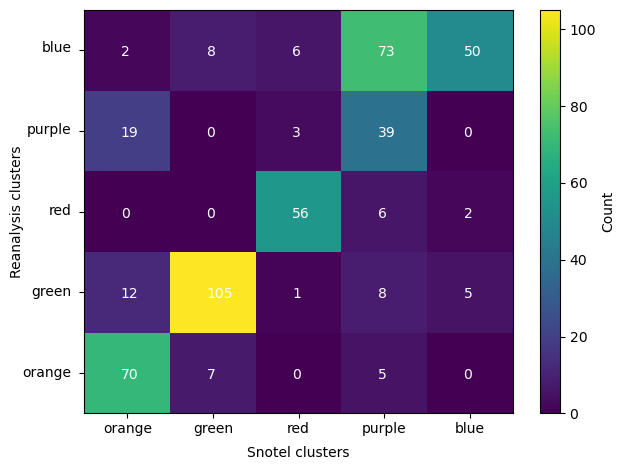

In [265]:
fig, ax = plt.subplots()

BINS = [-0.5,0.5,1.5,2.5,3.5,4.5]

sm = ax.hist2d(station_clusters[station_clusters['cluster_sampled_conv'] != -1]['cluster_anom'], \
        station_clusters[station_clusters['cluster_sampled_conv'] != -1]['cluster_sampled_conv'], 
               bins=BINS) 

# below code from https://www.reddit.com/r/learnpython/comments/j5bk91/2d_histogram_bin_count/
for ix, x_pos in enumerate(sm[1][0:5]):
    for iy, y_pos in enumerate(sm[2][0:5]):
        label = int(sm[0][ix][iy])
        # print(f"bin({int(x_pos)},{int(y_pos)}): {int(label)}")
        plt.text(x_pos+0.425, y_pos+0.425, label, color='w')

bin_colors = ['orange', 'green','red', 'purple','blue']
for x, label in zip(BINS, bin_colors):
    # Label the raw counts
    ax.annotate(label, xy=(x+0.5, 0.04), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

for y, label in zip(BINS, bin_colors):
    # Label the raw counts
    ax.annotate(label, xy=(-0.65, (y/4.97 + 0.28)), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='right')
# for y, label in zip(BINS, bin_colors):    
#     ax.annotate(label, xy=(0.05,y+0.5)), xycoords=('data','axes fraction'), 
#         xytext=(0,-18), textcoords='offset points', va='top', ha='center')
ax.set_xlabel('Snotel clusters',labelpad=20)
ax.set_ylabel('Reanalysis clusters',labelpad=40)
#ax.set_axis_off()
ax.tick_params(labelbottom=False) 
ax.tick_params(labelleft=False) 
cbar = fig.colorbar(sm[3], ax=ax, format=matplotlib.ticker.ScalarFormatter())
cbar.set_label("Count")
plt.tight_layout()
plt.savefig('../../figures/station_heatmap.jpeg',dpi=300)

The majority of stations are categorized in the same clusters. The one mismatch that stands out is where snotel had many stations in the purple cluster whereas reanalysis had them in the blue cluster.

In [108]:
clusters_tif_fn = '../../data/swe_reanalysis_5clusters.tif'

In [109]:
from rasterio import features

dnr_feat_list = []
#ovr_scale = 8
#dt_fieldnum = 4
src = rio.open(clusters_tif_fn)
a = src.read(1, masked=True)
mask = np.ma.getmaskarray(a).astype(np.uint8) - 1
shapes = features.shapes(a.astype('int16'), mask=mask, transform=src.transform)
geom_list = list(shapes)
#dt = os.path.splitext(os.path.split(dnr_fn)[-1])[0].split('_')[dt_fieldnum]
dnr_feat_list.extend([{'properties':{'date':'2017', 'cluster':i[1]}, 'geometry':i[0]} for i in geom_list]) #



#dnr_gdf = gpd.GeoDataFrame.from_features(dnr_feat_list, crs=src.crs)
cluster_gdf = gpd.GeoDataFrame.from_features(dnr_feat_list, crs=src.crs)



/Users/Hannah/micromamba/envs/analysis_2023/lib/python3.9/site-packages/numpy/ma/core.py:467: RuntimeWarning: invalid value encountered in cast
  fill_value = np.array(fill_value, copy=False, dtype=ndtype)
/var/folders/yr/1f67jccn6hl_lyxnqy7qjpq40000gp/T/ipykernel_4537/3062735003.py:9: RuntimeWarning: invalid value encountered in cast
  shapes = features.shapes(a.astype('int16'), mask=mask, transform=src.transform)


In [111]:
src.transform

Affine(0.035556692670482073, 0.0, -124.99999041298562,
       0.0, 0.035555414634175816, 31.000071261188772)

In [112]:
cluster_gdf

geometry  date  cluster
0     POLYGON ((-109.88840 32.67118, -109.88840 32.7...  2017      0.0
1     POLYGON ((-108.60836 33.24006, -108.60836 33.2...  2017      0.0
2     POLYGON ((-108.71503 33.24006, -108.71503 33.3...  2017      0.0
3     POLYGON ((-105.83493 33.34673, -105.83493 33.4...  2017      0.0
4     POLYGON ((-109.39060 33.56006, -109.39060 33.5...  2017      0.0
...                                                 ...   ...      ...
3123  POLYGON ((-115.47080 48.49334, -115.47080 48.5...  2017      2.0
3124  POLYGON ((-114.97300 48.49334, -114.97300 48.5...  2017      4.0
3125  POLYGON ((-115.04412 48.95556, -115.04412 48.9...  2017      4.0
3126  POLYGON ((-114.68855 43.58669, -114.68855 43.6...  2017      2.0
3127  POLYGON ((-111.55956 48.95556, -111.55956 48.9...  2017      2.0

[3128 rows x 3 columns]

In [117]:
from matplotlib.colors import LinearSegmentedColormap
colors1=['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00'] #,'#ffff33'
cmap1 = LinearSegmentedColormap.from_list('clusters', colors1)

/var/folders/yr/1f67jccn6hl_lyxnqy7qjpq40000gp/T/ipykernel_4537/1972707617.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cluster_gdf.plot(column='cluster', facecolor='none', cmap = plt.cm.get_cmap(cmap1, 6))


<Axes: >

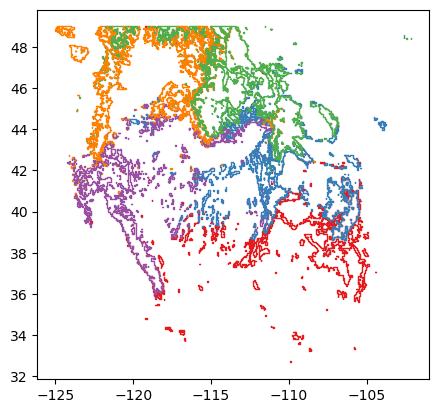

In [118]:
cluster_gdf.plot(column='cluster', facecolor='none', cmap = plt.get_cmap(cmap1, 6))

In [116]:
cluster_gdf.to_file('../../data/cluster_polygons.geojson', driver='GeoJSON')

In [28]:
station_clusters.head(2)

name network  elevation_m  \
code                                                
301_CA_SNTL         Adin Mtn  SNOTEL  1886.712036   
302_OR_SNTL  Aneroid Lake #2  SNOTEL  2255.520020   

                                             geometry cluster_anom  \
code                                                                 
301_CA_SNTL  POINT Z (-120.79192 41.23583 1886.71204)            3   
302_OR_SNTL  POINT Z (-117.19258 45.21328 2255.52002)            0   

             cluster_sampled  
code                          
301_CA_SNTL              NaN  
302_OR_SNTL         2.496181

In [49]:
station_clusters['code'] = station_clusters.index

In [33]:
import altair as alt

In [39]:
alt.Chart(station_clusters).mark_geoshape()

alt.Chart(...)

In [50]:
alt.Chart(station_clusters).mark_geoshape().encode(
    # longitude='geometry.x:Q',
    # latitude='geometry.y:Q',
    color='cluster_anom',
    tooltip='code'
).project(
    "albersUsa"
).properties(
    width=800,
    height=600
)


alt.Chart(...)